# nnU-Net V2 Workshop 
The nnU-Net is a toolkit to segment imaging data and was specifically designed for biomedical data.

It was designed by **Fabian Isensee** while pursuing his PhD at the [Medical Image Computing Division of the German Cancer Research Institute](https://www.dkfz.de/en/mic/index.php).

More information about nnU-Net, as well as the installataion guide on your own workstation can be found on:
- Isensee, F., Jaeger, P. F., Kohl, S. A. A., Petersen, J. & Maier-Hein, K. H. [nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation](http://www.nature.com/articles/s41592-020-01008-z). Nat Methods 18, 203–211 (2021).
- [nnU-Net GitHub Page](https://github.com/MIC-DKFZ/nnUNet)


## What is this Workshop all about?

The goal of this workshop is to allow end-users to understand in how to use nnU-Net version 2 for their own applications.

It includes initial setup and how to use nnU-Net in the Google Colab environment. 
Some steps are only needed for GoogleColab and will be explained, while others are generally applicable. 

Further it is advised to visualize the data with segmentations using the [MITK-Workbench](https://www.mitk.org/wiki/The_Medical_Imaging_Interaction_Toolkit_(MITK)), which is also developed in the Medical Image Computing Division of the German Cancer Research Institute - at least this is what we advocate.

- [MITK Workbench Download Link](https://www.mitk.org/wiki/Downloads)

### Requirements for Google Colab 
1. Google Account
   1. At least 4GB of free disk space
2. Visualization tool for volumetric data, we advise to use MITK.

### Some notes about the Workshop

This workshop was created by **Carsten Lüth**, a PhD student in the [Interactive Machine Learning Research Group](https://www.dkfz.de/en/interaktives-maschinelles-lernen/index.php) headed by Dr. Paul F. Jäger.

If you happen to find this workshop in any way useful, please share this version of it:
- [https://github.com/IML-DKFZ/nnunet-workshop](https://github.com/IML-DKFZ/nnunet-workshop)

## Further information

Further Information about nnU-Net is presented in the following lectures:
- [Lecture by Paul F. Jäger](https://www.youtube.com/watch?v=3po8qVzz5Tc&t=2196s)
- [Lecture by Fabian Isensee](https://www.youtube.com/watch?v=C6tpnJRpt90)

### MITK with nnU-Net
MITK has a new experimental feature which uses pretrained nnU-Net models as a segmentation tool.
This feature has been added since its release of version 2022.04.
For further information about this we refer to the [MITK Documentation](https://docs.mitk.org/2022.04/org_mitk_views_segmentation.html#org_mitk_views_segmentationnnUNetTool).


**Notes**:
- quite some time was spent to optimize the way of downloading and unpacking the data. I did not get to run it at all when automated... If you have any idea how to do this better (and show that it works I would greatly appreciate this!)

# 1. Import Packages for Google Colab

In [ ]:
# Import basic packages for later use
import os
import shutil
from collections import OrderedDict

import json
import matplotlib.pyplot as plt
import nibabel as nib

import numpy as np
import torch

In [ ]:
# check whether GPU accelerated computing is available
assert torch.cuda.is_available() # if there is an error here, enable GPU in the Runtime

# 2. Installing nnU-Net

In [ ]:
# due to problems with the dataset with newest simple ITK version preinstall a special version
# for more information about this see: https://github.com/MIC-DKFZ/nnUNet/issues/756
!pip install SimpleITK==2.0.2

     |████████████████████████████████| 47.4 MB 1.4 MB/s 


In [ ]:
# install nnunet - yes it is that easy
!pip install nnunetv2


     |████████████████████████████████| 251 kB 12.6 MB/s 
     |████████████████████████████████| 151 kB 45.1 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████████████| 96 kB 6.0 MB/s 
     |████████████████████████████████| 2.0 MB 44.8 MB/s 
  Created wheel for nnunet: filename=nnunet-1.7.0-py3-none-any.whl size=487821 sha256=13eaebaba6a6193002385a2d21b302108b66247448de3802584ed33efd4089aa
  Stored in directory: /root/.cache/pip/wheels/66/f6/19/c51389976a9ae30212178d1c41497893504b900f043fe1c665
  Created wheel for batchgenerators: filename=batchgenerators-0.23-py3-none-any.whl size=84779 sha256=d5d6bfedfc9240e0afa65847249ada5cfd668f0317fc89fd220109696d6d25ea
  Stored in directory: /root/.cache/pip/wheels/81/3d/a2/9a602ce56458c684d2962ec89eddd6bc06b00687735e2dd11a
  Created wheel for dicom2nifti: filename=dicom2nifti-2.3.0-py3-none-any.whl size=42932 sha256=becb646cdb13e8c24abfc4f47d49effc82562dfe92922bb2e94c7a8a2d0d9364
  Stored in directory:

**Note**: you do not have to restart the Runtime even when the following error appears, this is simply due to a reinstallation of a package - so no worries. 


```
WARNING: The following packages were previously imported in this runtime:

[argparse]

You must restart the runtime in order to use newly installed versions.
```

# 3. Verifying installation of nn-Unet

In [ ]:
# check if nnunet can be imported
import nnunetv2




Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet



You should read the following if the installation was successful:


```
Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

```



## 3.1 Installation and initialization of Weights&Biases (non-mandatory)
This is a package which allows you to easily visualize metrics during your training.

We will use this here to get access to System Information (GPU utilization etc.)when running on Google Colab - however it is also useful to use at a local workstation.

To use Weights&Biases you will need an account.
This can be created at https://wandb.ai

During the initialization with ```wandb.init()``` it will ask you for an API key, which you can obtain from:
https://wandb.ai/settings 
under API keys

In [ ]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 12.3 MB/s 
     |████████████████████████████████| 97 kB 7.9 MB/s 
     |████████████████████████████████| 180 kB 26.8 MB/s 
     |████████████████████████████████| 143 kB 48.2 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=eaaf0543df0294cf3cb2583c2d14179e8dbc32e10d1d05b3df4763dde834f8b6
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=91c1dab069184554e80786c52b386f2b89145dfb96f327d8c5372f07bd38d789
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [ ]:
import wandb
wandb.init(project="nnU-Net_Workshop")

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


### 3.2 Installation of GDOWN (only for in-person workshops)
GDown allows to download files from GoogleDrive with Python.
Therefore it is used for in-person workshops.

In [ ]:
# install gdown to download files from GoogleDrive
!pip install gdown

# 4. Connect Google Colab with GoogleDrive
This is heavily encouraged when using Google Colab, otherwise loading, accessing and saving of data checkpoints etc. is just much harder (if not impossible).

**Note**:
When ```drive.mount()``` is executed, there will appear a popup window, which will ask you which Google Account should be connected and then for permission regarding Colab accessing your GoogleDrive.

There can be some problems at this step, for me the solution was to Download the GoogleDrive Application.
You can download it from: https://www.google.com/drive/download/


If there are any problems at this stage, feel free to contact me (during the workshop).

In [ ]:
# for colab users only - mounting the drive

from google.colab import drive
drive.mount('/content/drive',force_remount = True)

drive_dir = "/content/drive/My Drive"
mount_dir = os.path.join(drive_dir, "Colab Notebooks")
base_dir = os.getcwd()

Mounted at /content/drive


In [ ]:
assert os.path.exists(drive_dir) # if this fails, something went wrong with mounting GoogleDrive
if os.path.exists(mount_dir) is False:
    os.makedirs(mount_dir)

# 5. Setting up nnU-Nets folder structure and environment variables
nnUnet expects a certain folder structure and environment variables. 

Roughly they tell nnUnet:
1. Where to look for stuff
2. Where to put stuff

For more information about this please check: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/setting_up_paths.md

In [ ]:
def make_if_dont_exist(folder_path,overwrite=False):
    """
    creates a folder if it does not exists
    input: 
    folder_path : relative path of the folder which needs to be created
    over_write :(default: False) if True overwrite the existing folder 
    """
    if os.path.exists(folder_path):
        
        if not overwrite:
            print(f"{folder_path} exists.")
        else:
            print(f"{folder_path} overwritten")
            shutil.rmtree(folder_path)
            os.makedirs(folder_path)

    else:
      os.makedirs(folder_path)
      print(f"{folder_path} created!")

## 5.1 Set environment Variables and creating folders

In [ ]:
# Maybe move path of preprocessed data directly on content - this may be signifcantely faster!
print("Current Working Directory {}".format(os.getcwd()))
path_dict = {
    "nnUNet_raw" : os.path.join(mount_dir, "nnUNet_raw"), 
    "nnUNet_preprocessed" : os.path.join(mount_dir, "nnUNet_preprocessed"), # 1 experiment: 1 epoch took 112s
    "nnUNet_results" : os.path.join(mount_dir, "nnUNet_results"),
    "RAW_DATA_PATH" : os.path.join(mount_dir, "RawData"), # This is used here only for convenience (not necessary for nnU-Net)!
}

# Write paths to environment variables
for env_var, path in path_dict.items():
  os.environ[env_var] = path 

# Check whether all environment variables are set correct!
for env_var, path in path_dict.items():
  if os.getenv(env_var) != path:
    print("Error:")
    print("Environment Variable {} is not set correctly!".format(env_var))
    print("Should be {}".format(path))
    print("Variable is {}".format(os.getenv(env_var)))
  make_if_dont_exist(path, overwrite=False)

print("If No Error Occured Continue Forward. =)")

Current Working Directory /content
/content/drive/My Drive/Colab Notebooks/nnUNet_raw_data_base exists.
/content/drive/My Drive/Colab Notebooks/nnUNet_preprocessed exists.
/content/drive/My Drive/Colab Notebooks/nnUNet_Results_Folder exists.
/content/drive/My Drive/Colab Notebooks/RawData exists.
If No Error Occured Continue Forward. =)


# 6. Using nnU-Net on Medical Decathlon tasks
To get us started and also verify that nnU-Net works properly on our system, we will now run a training with nnU-Net and then make some predictions.

This will be done on parts of the Medical Decathlon Dataset, because everything is already nicely set up for these datasets.

Also for these two tasks there exist pre-written scripts, automatically unpacking and preparing the data for nnU-Net to use.

For this we will follow the two examples given in the nnU-Net repository for:
- [Training on Task004 Hippocampus Dataset](https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/training_example_Hippocampus.md)
- [Run Inference on Task005 Prostate Dataset](https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/inference_example_Prostate.md)

Bottom Line:
If something goes wrong here, it is worth to check whether anything went wrong before these steps! 

## 6.1 Downloading the Data
Download the data, unpack it and put it in the proper folder.
Generally, you will then have to download and move the files to the correct folder yourself.

Link to official [GoogleDrive](https://drive.google.com/drive/folders/1HqEgzS8BV2c7xYNrZdEAnrHk7osJJ--2) for the download.

If you are doing this by hand - skip the two next cells!

### 6.1.1 Downloading the Data for in-person workshops
For in person workshops, this will be automated and I host the data from GoogleDrive.
This is due to time constraints of this workshop and I will take the links down later!

In [ ]:
# only for in person workshops

# Download the data with gdown

os.chdir(path_dict["RAW_DATA_PATH"])
# Download the Hippocampus Dataset
!gdown 'https://drive.google.com/uc?export=download&id=1L-22VV6J8O6afTSOQuQKFiH-tblxb_TW'

# Download the Prostate Dataset
!gdown  'https://drive.google.com/uc?export=download&id=1L-4D5szfpo7eO639TBmnukw9y_X9h5Yc'
os.chdir(base_dir)

print("Data should be located in folder: {}".format(path_dict["RAW_DATA_PATH"]))
assert os.path.isfile(os.path.join(path_dict["RAW_DATA_PATH"], "Task04_Hippocampus.zip")) # check whether the file is correctly downloaded
assert os.path.isfile(os.path.join(path_dict["RAW_DATA_PATH"], "Task05_Prostate.zip")) # check whether the file is correctly downloaded


In [ ]:
# only for in person workshops

# unzip the files in the folder
os.chdir(path_dict["RAW_DATA_PATH"])
!unzip Task04_Hippocampus.zip
!unzip Task05_Prostate.zip
os.chdir(base_dir)

### 6.1.2 Verification of data
Here we test, wether the data is saved in the correct folder structure.

In [ ]:
print("Data should be located in folder: {}".format(path_dict["RAW_DATA_PATH"]))
assert os.path.exists(os.path.join(path_dict["RAW_DATA_PATH"], "Task04_Hippocampus")) # check whether the file is correctly downloaded
assert os.path.exists(os.path.join(path_dict["RAW_DATA_PATH"], "Task05_Prostate")) # check whether the file is correctly downloaded

## 6.2 Training nnU-Net on the Decathlon Task004 Hippocampus
For this we will use already pre-existing scripts for handling the data.

### 6.2.1 Dataset Conversion
The Decathlon datasets are 4D nifti files, for nnU-Net they have to be converted to 3D nifti files.

For more information about dataset conversion see: [nnU-Net Dataset Conversion](https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/dataset_conversion.md)

In [ ]:
!nnUNetv2_convert_MSD_dataset -i "${RAW_DATA_PATH}/Task04_Hippocampus"



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet



## 6.2.2 Extracting Rule Based Parameters
This will preprocess the dataset to allow fast training and saves it into the "nnUNet_preprocessed" folder.
Further rule based parameters will be extracted in the planning step.

In [ ]:
# Prepare the Execution of nnU-Net for Dataset 4 - this is the Hippocampus Dataset here (taking 1-2 minutes)
!nnUNetv2_plan_and_preprocess -d 4



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

hippocampus_367
hippocampus_189
hippocampus_185
hippocampus_294
hippocampus_064
hippocampus_150
hippocampus_314
hippocampus_107
hippocampus_243
hippocampus_304
hippocampus_099
hippocampus_007
hippocampus_343
hippocampus_050
hippocampus_023
hippocampus_332
hippocampus_204
hippocampus_269
hippocampus_353
hippocampus_296
hippocampus_220
hippocampus_105
hippocampus_394
hippocampus_232
hippocampus_279
hippocampus_277
hippocampus_253
hippocampus_288
hippocampus_178
hippocampus_097
hippocampus_123
hippocampus_298
hippocampus_318
hippocampus_308
hippocampus_222
hippocampus_042
hippocampus_166
hippocampus_320
hippocampus_176
hippocampus_15

### 6.2.3 Training nnU-Net
here we will train a 3D nnU-Net on Full Resolution for 2 epochs.

To run a normal training use: ```nnUNetTrainerV2``` instead of ```nnUNetTrainerV2_2epochs```

In [ ]:
# train the 3d nnUnet on the Full Resolution with Dataset 4 and Cross Validation Split 0
!nnUNetv2_train 4 3d_fullres 0 -tr nnUNetTrainerV2_2epochs 

# Training for 2 iterations will take 



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 3d_fullres
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2.nnUNetTrainerV2'>
For that I will be using the following configuration:
num_classes:  2
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, False)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 9, 'num_pool_per_axis': [3, 3, 3], 'patch_size': array([40, 56, 40]), 'median_patient_size_in_voxels': array([36, 50, 35]), 'current_spaci

## 6.3 Inference with Pre-Trained Models on Decathlon Prostate Dataset
Here we will use a pretrained model on the Prostate Dataset and visualize the results

### 6.3.1 Downloading Pretrained Model
First Download the pretrained models and validate that everything works correctly 

In [ ]:
# Download the Pretrained Model for the Prostate Dataset (Decathlon Task)
!nnUnetv2_download_pretrained_model_from_url

# takes roughly 9 minutes



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet


######################################################
!!!!!!!!!!!!!!!!!!!!!!!!WARNING!!!!!!!!!!!!!!!!!!!!!!!
######################################################
Using the pretrained model weights is subject to the license of the dataset they were trained on. Some allow commercial use, others don't. It is your responsibility to make sure you use them appropriately! Use nnUNet_print_pretrained_model_info(task_name) to see a summary of the dataset and where to find its license!
######################################################

Download finished. Extracting...
Done


### 6.3.2 Convert Prostate Dataset
For inference the data has to be saved into the format nnU-Net expects as input (as detailed in 6.2.1).

In [ ]:
# Preprocess Prostate Dataset
!nnUNetv2_convert_decathlon_task -i "${RAW_DATA_PATH}/Task05_Prostate"



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet



### 6.3.3 Inference on the Prostate Dataset
Use 3d_fulles nnUnet (-m) trained on task 5 (-t 5) on the test dataset and save the outputs

In [ ]:
# use fully trained nnU-Net to make predictions on data
!nnUNet_predict -i "${nnUNet_raw}/Dataset005_Prostate/imagesTs/" -o "${nnUNet_results}/Dataset005_Prostate/predTs/" -t 5 -c 3d_fullres



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

using model stored in  /content/drive/My Drive/Colab Notebooks/nnUNet_Results_Folder/nnUNet/3d_fullres/Task005_Prostate/nnUNetTrainerV2__nnUNetPlansv2.1
This model expects 2 input modalities for each image
Found 16 unique case ids, here are some examples: ['prostate_36' 'prostate_09' 'prostate_12' 'prostate_27' 'prostate_30'
 'prostate_26' 'prostate_08' 'prostate_27' 'prostate_12' 'prostate_36']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
number of cases: 16
number of cases that still need to be predicted: 0
emptying cuda cache
loading parameters for folds, None
folds is 

## 6.3.4 Visualization of Data and Segmentations
Download files from Google Drive:

Images from: ```${nnUNet_raw_data_base}/nnUNet_raw_data/Task005_Prostate/imagesTs/```

Segmentations from: ```${RESULTS_FOLDER}/Task005_Prostate/predTs/"```


After downloading these files you can visualize them with any volumetric visualization program.
For this we would advise to use [MITK](https://www.mitk.org/wiki/The_Medical_Imaging_Interaction_Toolkit_(MITK)) which already has some great [tutorials](https://www.mitk.org/wiki/Tutorials).


Note:
- If you have not already downloaded it, here is the [MITK Download Link](https://www.mitk.org/wiki/Downloads)

This is also the end of the basic tutorial.

# 7. How to train and use nnU-Net on a new Dataset?

Goal of the next Steps:
- How can you Implement nnU-Net for a new Dataset?
  - Example using the GM Spinal Cord Segmentation Challenge Dataset
    - [Data & Task Explanation](https://www.sciencedirect.com/science/article/pii/S1053811917302185)
    - [Data Download Link](http://cmictig.cs.ucl.ac.uk/niftyweb/challenge/)
- How to store the Data for use with nnU-Net?
  - General Information can be found [here](https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/dataset_conversion.md)
- How to create the Data Fingerprint?
- How to create the Pipeline Fingerprint based on Rules?

This part of the Tutorial based on: 

The [GoogleColab Notebook](https://github.com/prateekgupta891/nnUNet/blob/master/nnunetmec2020.ipynb) and the [Medium Article about nnU-Net](https://medium.com/miccai-educational-initiative/nnu-net-the-no-new-unet-for-automatic-segmentation-8d655f3f6d2a)
written in the context of the MICCAI Educational Initiative by:
- Prateek Gupta, Indian Institute of Information Technology, Pune (prateekgupta16@alumni.iiitp.ac.in)
- Kumar T. Rajamani, Institute of Medical Informatics, University of Lübeck, Germany (kumar.rajamani@uni-luebeck.de)
- Mattias P. Heinrich, Institute of Medical Informatics, University of Lübeck, Germany (heinrich@imi.uni-luebeck.de)

Many Thanks to them!

In [ ]:
# Create Folderstructure for the new task!
dataset_name = 'Dataset501_SCGM' #change here for different task name
nnunet_raw_data = os.path.join(os.getenv("nnUNet_raw"))
# nnunet_raw_data = "nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data"
task_folder_name = os.path.join(nnunet_raw_data,dataset_name)
train_image_dir = os.path.join(task_folder_name,'imagesTr')
train_label_dir = os.path.join(task_folder_name,'labelsTr')
test_dir = os.path.join(task_folder_name,'imagesTs')
# main_dir = os.path.join(base_dir,'nnUNet/nnunet')

# Create Folder Structure for the SCGM Task on the system
make_if_dont_exist(task_folder_name)
make_if_dont_exist(train_image_dir)
make_if_dont_exist(train_label_dir)
make_if_dont_exist(test_dir)

training_data_name="training-data-gm-sc-challenge-ismrm16-v20160302b"
test_data_name="test-data-gm-sc-challenge-ismrm16-v20160401"

/content/drive/My Drive/Colab Notebooks/nnUNet_raw_data_base/nnUNet_raw_data/Task501_SCGM created!
/content/drive/My Drive/Colab Notebooks/nnUNet_raw_data_base/nnUNet_raw_data/Task501_SCGM/imagesTr created!
/content/drive/My Drive/Colab Notebooks/nnUNet_raw_data_base/nnUNet_raw_data/Task501_SCGM/labelsTr created!
/content/drive/My Drive/Colab Notebooks/nnUNet_raw_data_base/nnUNet_raw_data/Task501_SCGM/imagesTs created!


## 7.1 Data Download
Again, now the data has to be put into the proper place in the folder structure. 

In case you are not attending an in person workshop please skip the next cell.


In [ ]:
# only for in poerson workshops

os.chdir(task_folder_name)
# download training data
!gdown 'https://drive.google.com/uc?export=download&id=1Kynj_jFKwjXlSWkOf5A9uvfF0UAolpZl'
!ls
os.chdir(base_dir)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Kynj_jFKwjXlSWkOf5A9uvfF0UAolpZl
To: /content/drive/My Drive/Colab Notebooks/nnUNet_raw_data_base/nnUNet_raw_data/Task501_SCGM/training-data-gm-sc-challenge-ismrm16-v20160302b.zip
100% 122M/122M [00:00<00:00, 126MB/s]
imagesTr  labelsTr
imagesTs  training-data-gm-sc-challenge-ismrm16-v20160302b.zip


In [ ]:
# continue from here again.
if os.path.isfile(os.path.join(task_folder_name, training_data_name+'.zip')) is False: 
  print("Please download the dataset zipfiles and place them into the following directory: \n {}".format(task_folder_name))
else:
  print(f'Training file for exists SCGM Challenge exists')

Training file for exists SCGM Challenge exists


In [ ]:
# verify that files are in the correct place!
os.chdir(task_folder_name)
!ls
if os.path.isfile(training_data_name+'.zip'):
    print(f'Training file for exists SCGM Challenge exists')
else:
    print('Training file for SCGM Challenge is not present in the directory')
    print("Please check whether {}.zip is in Folder {}".format(training_data_name, task_folder_name))

# Testing Data is sadly Currently not available
# if os.path.isfile(test_data_name+'.zip'):
#     print('Testing file for SCGM Challenge exists')
# else:
#     print('Testing file for SCGM Challenge is not present in the directory')
#     print("Please check whether {}.zip is in Folder {}".format(test_data_name, task_folder_name))
os.chdir(base_dir)
print("We are currently in working directory {}".format(os.getcwd()))

imagesTr  labelsTr
imagesTs  training-data-gm-sc-challenge-ismrm16-v20160302b.zip
Training file for exists SCGM Challenge exists
We are currently in working directory /content


In [ ]:
#unzipping in nnUNet_raw folder the training data
os.chdir(task_folder_name)
!unzip training-data-gm-sc-challenge-ismrm16-v20160302b.zip
os.chdir(base_dir)

Archive:  training-data-gm-sc-challenge-ismrm16-v20160302b.zip
   creating: training-data-gm-sc-challenge-ismrm16-v20160302b/
  inflating: __MACOSX/._training-data-gm-sc-challenge-ismrm16-v20160302b  
  inflating: training-data-gm-sc-challenge-ismrm16-v20160302b/site1-sc04-levels.txt  
  inflating: __MACOSX/training-data-gm-sc-challenge-ismrm16-v20160302b/._site1-sc04-levels.txt  
  inflating: training-data-gm-sc-challenge-ismrm16-v20160302b/site3-sc05-mask-r3.nii.gz  
  inflating: __MACOSX/training-data-gm-sc-challenge-ismrm16-v20160302b/._site3-sc05-mask-r3.nii.gz  
  inflating: training-data-gm-sc-challenge-ismrm16-v20160302b/site3-sc10-mask-r3.nii.gz  
  inflating: __MACOSX/training-data-gm-sc-challenge-ismrm16-v20160302b/._site3-sc10-mask-r3.nii.gz  
  inflating: training-data-gm-sc-challenge-ismrm16-v20160302b/site4-sc01-image.nii.gz  
  inflating: __MACOSX/training-data-gm-sc-challenge-ismrm16-v20160302b/._site4-sc01-image.nii.gz  
  inflating: training-data-gm-sc-challenge-ismr

## 7.2 Data Preprocessing
We have 4 annotation of the same image, by different experts in the SCGM Challenge. ( Image , Ann1 ) and ( Image , Ann2 ) can be considered as a different image and label pairs. Hence, 4 copies of the training .nii.gz file is created with its mapping to the respective label name.

For this the data is renamed and relocated

In [ ]:
# function for copying, savind and renaming
def copy_and_rename(old_location,old_file_name,new_location,new_filename,delete_original = False):

    shutil.copy(os.path.join(old_location,old_file_name),new_location)
    os.rename(os.path.join(new_location,old_file_name),os.path.join(new_location,new_filename))
    if delete_original:
        os.remove(os.path.join(old_location,old_file_name))

# putting training images into folder

mask_count = 4 # change if more mask is available
base_data_folder_name = os.path.join(task_folder_name, "training-data-gm-sc-challenge-ismrm16-v20160302b")

for file in os.listdir(base_data_folder_name):
    # print(file)
    if file.endswith('.nii.gz'):
        if file.find('mask')!=-1:
            # putting mask
            shutil.move(os.path.join(base_data_folder_name,file),train_label_dir)
        else:
            # making 4 copies
            for mask in range(1,mask_count+1):
                new_filename = file[:file.find('-image')] + '-mask-r' + str(mask) + '.nii.gz'
                if mask==mask_count:
                    copy_and_rename(base_data_folder_name,file,train_image_dir,new_filename,delete_original = True)
                else:
                    copy_and_rename(base_data_folder_name,file,train_image_dir,new_filename)
    # removing all other files installed due to the unzip
    elif file.endswith('.txt'):
        os.remove(os.path.join(base_data_folder_name,file))

## 7.3 Verification of Data

Before going any further, verify that the data is present and labels and data matches.

In [ ]:
train_files = os.listdir(train_image_dir)
label_files = os.listdir(train_label_dir)
print("train image files:",len(train_files))
print("train label files:",len(label_files))
print("Matches:",len(set(train_files).intersection(set(label_files))))

assert len(set(train_files).intersection(set(label_files))) == 160 #should be equal to 160 for SCGM Challenge

train image files: 160
train label files: 160
Matches: 160


In [ ]:
#renaming to add the modality for SCGM there is only one modality 
#images should be added with 0000
#can be skipped if modality is already mentioned
#re-write for multiple modalities

def check_modality(filename):
    """
    check for the existence of modality
    return False if modality is not found else True
    """
    end = filename.find('.nii.gz')
    modality = filename[end-4:end]
    for mod in modality: 
        if not(ord(mod)>=48 and ord(mod)<=57): #if not in 0 to 9 digits
            return False
    return True

def rename_for_single_modality(directory):
    
    for file in os.listdir(directory):
        
        if check_modality(file)==False:
            new_name = file[:file.find('.nii.gz')]+"_0000.nii.gz"
            os.rename(os.path.join(directory,file),os.path.join(directory,new_name))
            print(f"Renamed to {new_name}")
        else:
            print(f"Modality present: {file}")

rename_for_single_modality(train_image_dir)

# again skip test due to non available data
# rename_for_single_modality(test_dir)

Renamed to site4-sc01-mask-r4_0000.nii.gz
Renamed to site4-sc01-mask-r1_0000.nii.gz
Renamed to site4-sc01-mask-r2_0000.nii.gz
Renamed to site4-sc01-mask-r3_0000.nii.gz
Renamed to site4-sc06-mask-r4_0000.nii.gz
Renamed to site4-sc06-mask-r1_0000.nii.gz
Renamed to site4-sc06-mask-r2_0000.nii.gz
Renamed to site4-sc06-mask-r3_0000.nii.gz
Renamed to site1-sc06-mask-r4_0000.nii.gz
Renamed to site1-sc06-mask-r1_0000.nii.gz
Renamed to site1-sc06-mask-r2_0000.nii.gz
Renamed to site1-sc06-mask-r3_0000.nii.gz
Renamed to site1-sc01-mask-r4_0000.nii.gz
Renamed to site1-sc01-mask-r1_0000.nii.gz
Renamed to site1-sc01-mask-r2_0000.nii.gz
Renamed to site1-sc01-mask-r3_0000.nii.gz
Renamed to site4-sc07-mask-r4_0000.nii.gz
Renamed to site4-sc07-mask-r1_0000.nii.gz
Renamed to site4-sc07-mask-r2_0000.nii.gz
Renamed to site4-sc07-mask-r3_0000.nii.gz
Renamed to site1-sc07-mask-r4_0000.nii.gz
Renamed to site1-sc07-mask-r1_0000.nii.gz
Renamed to site1-sc07-mask-r2_0000.nii.gz
Renamed to site1-sc07-mask-r3_0000

## 7.4 Creation of the Task501 for the SCGMC Dataset
The Task gives nnU-Net Information for the Planning and Preprocessing Step.

Based on the parameters of the task, the "optimal strategy" is selected (data fingerprint & pipeline fingerprint)

This is done by creating the ```dataset.json``` file.




In [ ]:
overwrite_json_file = True #make it True if you want to overwrite the dataset.json file in Task_folder
json_file_exist = False

if os.path.exists(os.path.join(task_folder_name,'dataset.json')):
    print('dataset.json already exist!')
    json_file_exist = True

if json_file_exist==False or overwrite_json_file:

    json_dict = OrderedDict()
    json_dict['name'] = dataset_name
    json_dict['description'] = "Spinal Cord Grey Matter Segmenation Challenge"
    json_dict['tensorImageSize'] = "3D"
    json_dict['reference'] = "see challenge website"
    json_dict['licence'] = "see challenge website"
    json_dict['release'] = "0.0"

    #you may mention more than one modality
    json_dict['modality'] = {
        "0": "MRI"
    }
    #labels+1 should be mentioned for all the labels in the dataset
    json_dict['labels'] = {
        "0": "background",
        "1": "grey matter",
        "2": "white matter"
    }
    
    train_ids = os.listdir(train_label_dir)
    test_ids = os.listdir(test_dir)
    json_dict['numTraining'] = len(train_ids)
    json_dict['numTest'] = len(test_ids)


    with open(os.path.join(task_folder_name,"dataset.json"), 'w') as f:
        json.dump(json_dict, f, indent=4, sort_keys=True)

    if os.path.exists(os.path.join(task_folder_name,'dataset.json')):
        if json_file_exist==False:
            print('dataset.json created!')
        else: 
            print('dataset.json overwritten!')

dataset.json created!


## 7.5 Dataset Preprocessing
Also to ensure that nnU-Net can be trained on the dataset a integrity check is performed.

In [ ]:
# verify that the dataset will work & create plans for configuration 3d_fullres - this may take about X minutes
!nnUNetv2_plan_and_preprocess -d 501 -c 3d_fullres --verify_dataset_integrity



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

Verifying training set
checking case site2-sc07-mask-r1
checking case site4-sc01-mask-r4
checking case site3-sc07-mask-r2
checking case site3-sc10-mask-r1
checking case site2-sc01-mask-r4
checking case site4-sc01-mask-r3
checking case site3-sc02-mask-r1
checking case site3-sc09-mask-r2
checking case site1-sc03-mask-r2
checking case site2-sc06-mask-r1
checking case site1-sc04-mask-r4
checking case site2-sc05-mask-r1
checking case site1-sc06-mask-r4
checking case site4-sc01-mask-r2
checking case site3-sc03-mask-r3
checking case site4-sc05-mask-r3
checking case site1-sc02-mask-r1
checking case site1-sc09-mask-r4
checking case site3-s

## 7.6 Dataset Visualization
At this stage it is useful to examine the training and testing data.

Here is an example for how to do this in python, however we would encourage you to visualize the data with MITK-Workbench, since it allows much more interaction with the data and therefore better understanding.

Train Data (with Labels)

(100, 100, 3) (100, 100, 3)


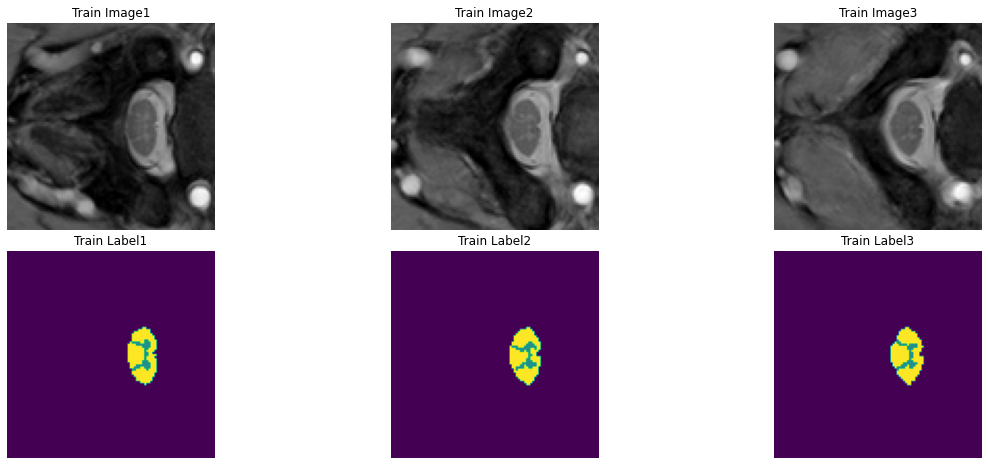

In [ ]:
#visualizing some of the training images and labels
# (re-run to see random pick-ups)
# only maximum of first 5 slices are plotted
train_img_name = os.listdir(train_image_dir)[np.random.randint(0,160)]
train_img = np.array(nib.load(os.path.join(train_image_dir,train_img_name)).dataobj)[:,:,:5]
train_label_name = train_img_name[:train_img_name.find('_0000.nii.gz')]+'.nii.gz'
train_label = np.array(nib.load(os.path.join(train_label_dir,train_label_name)).dataobj)[:,:,:5]

print(train_img.shape,train_label.shape)

max_rows = 2
max_cols = train_img.shape[2]

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,8))
for idx in range(max_cols):
    axes[0, idx].axis("off") 
    axes[0, idx].set_title('Train Image'+str(idx+1))
    axes[0 ,idx].imshow(train_img[:,:,idx], cmap="gray")
for idx in range(max_cols):    
    axes[1, idx].axis("off")
    axes[1, idx].set_title('Train Label'+str(idx+1))
    axes[1, idx].imshow(train_label[:,:,idx])

plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()

Note: In the label image, yellow color represents white Matter and green-ish color represents grey matter.

### 7.6.1 Sighting of Data and Lables with MITK-Workbench
At this stage it is also useful to analyze the imaging data with MITK-Workbench.
To do this, download the training data to your own local machine and visualize them via drag and drop into MITK-Workbench

This is already explained in part 6.3.4

## 7.7 Training nnU-Net

nnU-Net stores a checkpoint every 50 epochs. If you need to continue a previous training, just add a -c to the training command.

Generic Training Commands:

```nnUNetv2_train Dataset_NAME_OR_ID CONFIGURATION FOLD -tr TRAINER_CLASS_NAME (additional options)```

For 2D:  ```nnUNetv2_train DATASET_NAME_OR_ID 2d FOLD```

For 3D Full resolution: ```nnUNetv2_train DATASET_NAME_OR_ID 3d_fullres FOLD```

For Cascaded 3D:

First Run lowres: ```nnUNetv2_train DATASET_NAME_OR_ID 3d_lowres FOLD```

Then Run fullres: ```nnUNetv2_train DATASET_NAME_OR_ID 3d_cascade_fullres FOLD```

In [ ]:
# train nnU-Net with 3d_fullres model on the SCGM Task with Fold 0
# Again Training may take a while therefore it is advised to interrupt the training after some time (e.g. after 1 epoch)
# 1 Epoch takes approximately: over 30 minutes on GoogleColab -- you need GoogleColab Pro to run this completely
!nnUNetv2_train 501 3d_fullres 0 -tr nnUNetTrainerV2_2epochs 



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 3d_fullres
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2.nnUNetTrainerV2'>
For that I will be using the following configuration:
num_classes:  2
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, False)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 2, 'num_pool_per_axis': [2, 6, 6], 'patch_size': array([ 16, 320, 320]), 'median_patient_size_in_voxels': array([ 21, 401, 401]), 'current

## 7.8 Inference Code

nnUNet_find_best_configuration will print inference commands you need to use. The easiest way to run inference is to simply use these commands.

For each of the desired configurations, run:

```nnUNet_predict -i INPUT_FOLDER -o OUTPUT_FOLDER -t TASK_NAME_OR_ID -m CONFIGURATION --save_npz```

Only specify ```--save_npz``` if you intend to use ensembling. ```--save_npz``` will make the command save the softmax probabilities alongside of the predicted segmentation masks requiring a lot of disk space.

Note: Please select a separate OUTPUT_FOLDER for each configuration!

In [ ]:
# Optional
!nnUNetv2_find_best_configuration -d 501

In [ ]:
result_dir = os.path.join(os.getenv("RESULTS_FOLDER"),'nnUNet_Prediction_Results',dataset_name)
make_if_dont_exist(result_dir)

team_name = 'awesome_nnU-Net_team' #make sure to change for your own team name

**Note**: 

If you interrupted the training go the given fold inside of the RESULTS_FOLDER for the task and:
1. rename **model_best.model.pkl** to **model_final_checkpoint.model.pkl** 
2. rename **model_best.model** to **model_final_checkpoint.model** 

In [ ]:
#location where you want save your results, will be created if dont exist
!nnUNet_predict -i '${nnUNet_raw_data_base}/nnUNet_raw_data/Task101_SCGM/imagesTs' -o '${RESULTS_FOLDER}/Task101_SCGM/predTs' -d 501 -tr nnUNetTrainerV2 -c 3d_fullres #--num_threads_preprocessing 1

If you wish to run ensembling, you can ensemble the predictions from several configurations with the following command:

```nnUNet_ensemble -f FOLDER1 FOLDER2 ... -o OUTPUT_FOLDER -pp POSTPROCESSING_FILE```

## 7.9 Visualization of Predictions
Similar to the dataset visualization we would encourage you to do this with MITIK-Workbench.

Here is a quick visualization with python.

In [ ]:
#visualizing the predicted results
# (re-run to see random pick-ups)
# only maximum of first 5 slices are plotted

test_img_name = os.listdir(test_dir)[np.random.randint(0,40)]
test_img = np.array(nib.load(os.path.join(test_dir,test_img_name)).dataobj)[:,:,:5]
predicted_img_name = test_img_name[:test_img_name.find('_0000.nii.gz')]+'.nii.gz'
predicted_label = np.array(nib.load(os.path.join(result_dir,predicted_img_name)).dataobj)[:,:,:5]
print('Test Image Shape: ',test_img.shape)
print("Predicted Image Shape:",predicted_label.shape)

max_rows = 2
max_cols = test_img.shape[2]

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,8))
for idx in range(max_cols):
    axes[0, idx].axis("off") 
    axes[0, idx].set_title('Test Image'+str(idx+1))
    axes[0 ,idx].imshow(test_img[:,:,idx], cmap="gray")
for idx in range(max_cols):    
    axes[1, idx].axis("off")
    axes[1, idx].set_title('Predicted Label'+str(idx+1))
    axes[1, idx].imshow(predicted_label[:,:,idx])
    
plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()

# 8. Final Words
The Workshop and this tutorial is now finished.

If you made it this far, we hope you enjoyed the ride.

To further expand your knowledge about nnU-Net you may now want to tackle one of the following tasks:
- Use Pretrained nnU-Net models for other Decathlon Tasks.
- Look up a Dataset of your own and implement a new Task for nnU-Net.
- Download the nnU-Net repository to your local machine and familiarize yourself with the codebase.

Please feel free to share it with people who you believe might benefit from it.

# Acknowledgements
Many thanks to the people who tested this tutorial and gave feedback:
- Stephen Schaumann
- Robin Peretzke
- Santhosh P.
- Jonas Bohn
- Sebastian Ziegler
- Yannick Kirchhoff
- Tobias Norajitra
- Lars Krämer
- Peter Full
- Sebastian Zieger
- Lukas Klein
- Tassilo Wald
- Stefan Dinkelacker
- Fabian Isensee
- Paul Jäger